In [10]:
######     Using Prophet Model     ######
# !pip install prophet pandas numpy matplotlib scikit-learn

import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

print("✅ Libraries Imported")

✅ Libraries Imported


In [11]:
df = pd.read_csv('train_data.csv')
print(f"Data loaded: {df.shape}")
print("Sample data:")
print(df.head())

Data loaded: (150150, 9)
Sample data:
   record_ID        week  store_id  sku_id  total_price  base_price  \
0          1  17-01-2011      8091  216418      99.0375    111.8625   
1          2  17-01-2011      8091  216419      99.0375     99.0375   
2          3  17-01-2011      8091  216425     133.9500    133.9500   
3          4  17-01-2011      8091  216233     133.9500    133.9500   
4          5  17-01-2011      8091  217390     141.0750    141.0750   

   is_featured_sku  is_display_sku  units_sold  
0                0               0          20  
1                0               0          28  
2                0               0          19  
3                0               0          44  
4                0               0          52  


Daily data prepared: 130 days
Average daily sales: 59684 units


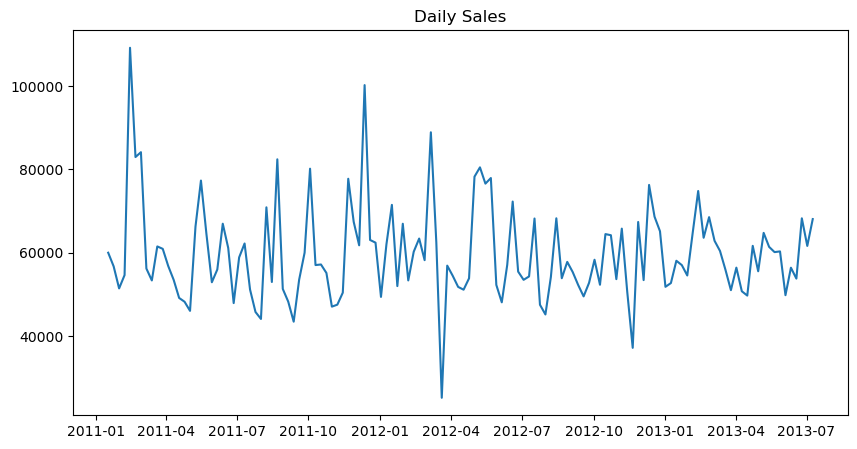

In [12]:
df['date'] = pd.to_datetime(df['week'], format='%d-%m-%Y')

daily_sales = df.groupby('date')['units_sold'].sum().reset_index()
daily_sales.columns = ['ds', 'y']

print(f"Daily data prepared: {len(daily_sales)} days")
print(f"Average daily sales: {daily_sales['y'].mean():.0f} units")

plt.figure(figsize=(10, 5))
plt.plot(daily_sales['ds'], daily_sales['y'])
plt.title('Daily Sales')
plt.show()

In [13]:
train_size = len(daily_sales) - 30
train_data = daily_sales[:train_size]
test_data = daily_sales[train_size:]

print(f"Training days: {len(train_data)}")
print(f"Test days: {len(test_data)}")

Training days: 100
Test days: 30


In [14]:
model = Prophet()

print("Training model...")
model.fit(train_data)
print("✅ Model trained!")

23:45:53 - cmdstanpy - INFO - Chain [1] start processing


Training model...


23:45:55 - cmdstanpy - INFO - Chain [1] done processing


✅ Model trained!


In [15]:
future = model.make_future_dataframe(periods=20)
forecast = model.predict(future)

test_predictions = forecast.tail(30)['yhat'].values
test_actual = test_data['y'].values

print("✅ Predictions generated!")

✅ Predictions generated!


In [16]:
rmse = np.sqrt(mean_squared_error(test_actual, test_predictions))

print(f"📊 RMSE: {rmse:.2f} units")
print(f"📊 Average sales: {test_actual.mean():.0f} units")
print(f"📊 Accuracy: {100 - (rmse/test_actual.mean())*100:.1f}%")

📊 RMSE: 6715.18 units
📊 Average sales: 59649 units
📊 Accuracy: 88.7%


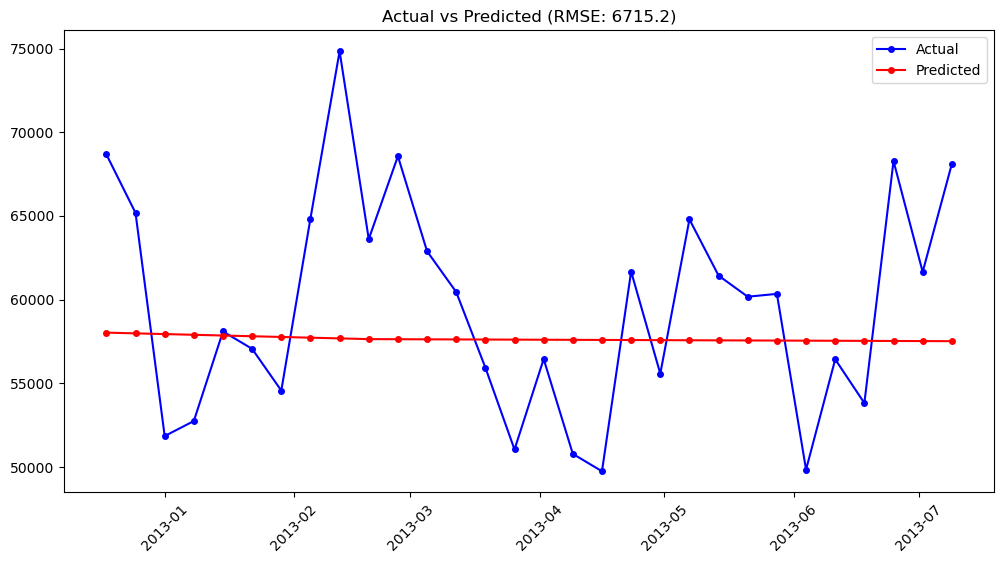

✅ Visualization Complete!


In [17]:
plt.figure(figsize=(12, 6))

plt.plot(test_data['ds'], test_actual, 'bo-', label='Actual', markersize=4)
plt.plot(test_data['ds'], test_predictions, 'ro-', label='Predicted', markersize=4)
plt.title(f'Actual vs Predicted (RMSE: {rmse:.1f})')
plt.legend()
plt.xticks(rotation=45)
plt.show()

print("✅ Visualization Complete!")

In [18]:
future_7days = model.make_future_dataframe(periods=37)
forecast_7days = model.predict(future_7days)

next_week = forecast_7days.tail(7)[['ds', 'yhat']].round(0)

print("Next 7 Days Forecast:")
for idx, row in next_week.iterrows():
    day_name = row['ds'].strftime('%A')
    date = row['ds'].strftime('%d-%m')
    print(f"🗓️ {day_name} ({date}): {row['yhat']:.0f} units")
    
total_next_week = next_week['yhat'].sum()
print(f"\n📊 Business Insights:")
print(f"🏪 Total inventory needed (next week): {total_next_week:.0f} units")
print(f"📦 Average daily demand: {total_next_week/7:.0f} units")


Next 7 Days Forecast:
🗓️ Friday (11-01): 57449 units
🗓️ Saturday (12-01): 57443 units
🗓️ Sunday (13-01): 57437 units
🗓️ Monday (14-01): 57431 units
🗓️ Tuesday (15-01): 57425 units
🗓️ Wednesday (16-01): 57418 units
🗓️ Thursday (17-01): 57412 units

📊 Business Insights:
🏪 Total inventory needed (next week): 402015 units
📦 Average daily demand: 57431 units


In [178]:
######     Using Random Forest Model     ######

# import pandas as pd

In [179]:
# df = pd.read_csv('train_data.csv')
# df

In [156]:
# df[['day', 'month', 'year']] = df['week'].str.split('-', expand=True)
# df = df.drop('week', axis=1)

In [157]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

# X, y = df.drop('units_sold', axis=1), df['units_sold']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
# model = RandomForestRegressor(n_jobs=-1)
# model.fit(X_train, y_train)

In [159]:
# model.score(X_test, y_test)

In [160]:
# from sklearn.metrics import root_mean_squared_error

# y_pred = model.predict(X_test)
# rmse = root_mean_squared_error(y_pred, y_test)

# rmse

In [161]:
# df.units_sold.describe()

In [162]:
# df.units_sold.hist()

In [163]:
# import numpy as np
# import matplotlib.pyplot as plt

# plt.scatter(y_pred, y_test)
# plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')

In [164]:
# df.hist(figsize=(15, 8))
# plt.show()

In [165]:
# df = df.drop('record_ID', axis=1)
# len(df.store_id.unique())

In [166]:
# len(df.sku_id.unique())

In [167]:
# df = df[df.units_sold < df.units_sold.quantile(0.99)]
# df.units_sold.hist(bins=20)

In [168]:
# df = df.join(pd.get_dummies(df.store_id, prefix='store'))
# df = df.join(pd.get_dummies(df.sku_id, prefix='item'))
# df = df.drop(['store_id', 'sku_id'], axis=1)

In [169]:
# model = RandomForestRegressor(n_jobs=-1)

# X, y = df.drop('units_sold', axis=1), df['units_sold']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
# model.fit(X_train, y_train)

In [171]:
# model.score(X_test, y_test)

In [172]:
# y_pred = model.predict(X_test)
# rmse = root_mean_squared_error(y_pred, y_test)

# rmse

In [173]:
# plt.scatter(y_pred, y_test)
# plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')

In [174]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [10, 20],
#     'min_samples_split': [2, 3]
# }

# model = RandomForestRegressor(n_jobs=-1)

# grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)

# grid_search.fit(X_train, y_train)

In [175]:
# best_model = grid_search.best_estimator_

In [176]:
# grid_search.best_params_

In [177]:
# best_model.score(X_test, y_test)